# Atividade 4: Processamento de Dados

**Índice**

  - [Contexto](#Contexto)
  - [Instruções (leia até o fim)](#Instruções-(leia-até-o-fim))
  - [Configurações](#Configurações)
  - [Carregando a base](#Carregando-a-base)
      - [Exercício 1](#Exercício-1)
      - [Exercício 2](#Exercício-2)
  - [Conversão de símbolos `?`](#Conversão-de-símbolos-?)
      - [Exercício 3](#Exercício-3)
      - [Exercício 4](#Exercício-4)
  - [Remoção de atributos](#Remoção-de-atributos)
      - [Exercício 5](#Exercício-5)
      - [Exercício 6](#Exercício-6)
  - [Valores ausentes que não removeremos](#Valores-ausentes-que-não-removeremos)
      - [Exercício 7](#Exercício-7)
      - [Exercício 8](#Exercício-8)
      - [Exercício 9](#Exercício-9)
      - [Exercício 10](#Exercício-10)
      - [Exercício 11](#Exercício-11)
      - [Exercício 12](#Exercício-12)
  - [Atributos com pouca informação](#Atributos-com-pouca-informação)
      - [Exercício 13](#Exercício-13)
      - [Exercício 14](#Exercício-14)
      - [Exercício 15](#Exercício-15)
      - [Exercício 16](#Exercício-16)
      - [Exercício 17](#Exercício-17)
  - [Últimos passos: atributos numéricos](#Últimos-passos:-atributos-numéricos)
      - [Exercício 18](#Exercício-18)
      - [Exercício 19](#Exercício-19)
  - [Separação e codificação dos dados](#Separação-e-codificação-dos-dados)
      - [Exercício 20](#Exercício-20)
      - [Exercício 21](#Exercício-21)
      - [Exercício 22](#Exercício-22)
      - [Exercício 23](#Exercício-23)
      - [Exercício 24](#Exercício-24)
      - [Exercício 25](#Exercício-25)

## Contexto

Em Aprendizado de Máquina e em Mineração de Dados, os dados são muito valiosos, mas também podem ser… irritantes. Antes de empregar algoritmos para induzir modelos e depois usar esses modelos para fazer previsões, existe um importante e, às vezes, longo trabalho de coletar, compreender, limpar, filtrar, transformar e preparar os dados.

Vários desses passos podem ser feitos com o conhecimento que você está adquirindo na disciplina. Outros podem exigir um pouco de intuição, conhecimento do domínio de aplicação ou até mesmo a opinião de especialistas na área.

Nesta aula, vamos falar especificamente dessas etapas.

Está disponível no ColabWeb um conjunto de dados “do mundo real”, `Diabetes130`, que você deverá baixar para utilizar nesta prática. Se quiser, o conjunto também pode ser encontrado no Google Drive. Dizemos que esse conjunto é “do mundo real” porque é composto por dados coletados no mundo real, sem muito controle. Eles foram coletados de pacientes que visitaram hospitais nos EUA por complicações causadas por diabetes. Você verá que, diferentemente de conjuntos *toy* com os quais trabalharemos com mais frequência, tanto os criados artificialmente (como `play_tennis`) quanto os coletados de maneira bem simples e controlada (`iris`), conjuntos “do mundo real” podem ser bem desafiadores.

Nesta prática, vamos fazer algumas etapas de pré-processamento dos dados, mas não necessariamente todos os passos que você preciaria fazer para utilizar um conjunto como este em uma aplicação real. Você verá que, mesmo após **vários** passos de filtragem e transformação, o conjunto ainda assim não será o ideal.

Além disso, ao final você irá treinar e testar um modelo de aprendizado de máquina. Não se preocupe ainda em compreender o que esse modelo faz. Use-o como uma “caixa preta”, aplicando-o no conjunto de dados. No futuro você irá compreender bem como ele funciona.

## Instruções (leia até o fim)

1. Este *notebook* é uma atividade prática para vocês fazerem “solo”;
1. Você pode solicitar ajuda para o professor, o estagiário em docência e seus colegas. Mande mensagens no nosso grupo no Telegram. Pode ser que sua dúvida seja a mesma de seus colegas;
1. Antes de pedir ajuda, tente usar o que você aprendeu nas aulas anteriores e faça buscas no Google;
1. Preencha todas as células que contêm o **TODO** (*to do* ou "para fazer");
1. Ao terminar, envie o *notebook* <span style="text-decoration: underline">completo</span>, incluindo as saídas das células, por meio do ColabWeb;
1. A versão disponivel no Colaboratory também deve ser enviada pelo ColabWeb.

**Esta atividade será sua primeira nota na disciplina.**

## Configurações

Obtenha o arquivo de dados no ColabWeb e certifique-o de que ele está disponível para o *notebook*.

**Opcional:** descomente e execute a célula abaixo para baixar do Google Drive (19&nbsp;MiB) — esse comando pode só estar disponível no Google Colaboratory.

In [700]:
!gdown 'https://drive.google.com/uc?id=12-kdoeMWDC0iQPVIg_JBdK4H0SViYSMQ'

Downloading...
From: https://drive.google.com/uc?id=12-kdoeMWDC0iQPVIg_JBdK4H0SViYSMQ
To: /content/diabetes130us.csv
100% 19.2M/19.2M [00:00<00:00, 142MB/s]


## Carregando a base

A base `Diabetes 130-US` é uma base real que contém dados de casos clínicos em hospitais dos Estados Unidos. A base foi disponibilizada no [repositório de Aprendizado de Máquina da Universidade da Califória em Irvine](https://archive.ics.uci.edu/ml/datasets/Diabetes+130-US+hospitals+for+years+1999-2008) (UCI) em 2014 e está associada ao seguinte artigo:

> Beata Strack, Jonathan P. DeShazo, Chris Gennings, Juan L. Olmo, Sebastian Ventura, Krzysztof J. Cios, and John N. Clore, “Impact of HbA1c Measurement on Hospital Readmission Rates: Analysis of 70,000 Clinical Database Patient Records,” BioMed Research International, vol. 2014, Article ID 781670, 11 pages, 2014.

A leitura do artigo é recomendada. Em síntese, o problema proposto é prever se um paciente ou uma paciente (daqui pra frente apenas “o paciente”, pra simplificar) precisará de um novo atendimento após uma ter passado por uma consulta por alguma complicação de diabtes. O conjunto possui 101.766 instâncias e  65 atributos, vários dos quais vamos remover.

A lista completa de atributos e os seus significados pode ser verificada no artigo. É essencial conhecer os dados antes de trabalhar com eles. Mas, antes de parar a tarefa e ler o artigo, vamos tentar ir por partes, um atributo por vez.

#### Exercício 1

> Comece importando a biblioteca Pandas (`as pd`) e use `pd.read_csv()` para carregar o arquivo CSV como um *data frame*.

In [701]:
import pandas as pd

In [702]:
data = pd.read_csv('diabetes130us.csv',keep_default_na=False)

Não mude o nome da variável. Ao longo do restante deste notebook haverá várias menções à variável `data`.

In [703]:
data

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101761,443847548,100162476,AfricanAmerican,Male,[70-80),?,1,3,7,3,...,No,Down,No,No,No,No,No,Ch,Yes,>30
101762,443847782,74694222,AfricanAmerican,Female,[80-90),?,1,4,5,5,...,No,Steady,No,No,No,No,No,No,Yes,NO
101763,443854148,41088789,Caucasian,Male,[70-80),?,1,1,7,1,...,No,Down,No,No,No,No,No,Ch,Yes,NO
101764,443857166,31693671,Caucasian,Female,[80-90),?,2,3,7,10,...,No,Up,No,No,No,No,No,Ch,Yes,NO


#### Exercício 2

> Use `data.columns` para ver a lista completa de atributos.

In [704]:
data.columns
print(len(data.columns))

50


A lista deve conter 50 valores.

### Conversão de símbolos `?`

Uma característica desse conjunto é que os valores ausentes são representados com o símbolo `?`. Essa é, na verdade, a representação usual em Aprendizado de Máquina. A representação por meio de NAN ou `None` é uma característica de iplementação das biblioteas em Python.

Para facilitar a manipulação dos dados, a primeira coisa a se fazer é substituir as ocorrências da string `'?'` por `np.nan`.

#### Exercício 3

> Importe o NumPy (`as np`).

In [705]:
import numpy as np

Usando `data == '?'`, podemos obter todas as ocorrências dessa string.

In [706]:
data == '?'

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,False,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101761,False,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
101762,False,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
101763,False,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
101764,False,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [707]:
#data.isna().any()

O resultado é um *data frame* que contém o mesmo formato do *data frame* original. As células que “casam” com a expressão `== '?'` contêm o valor `True` e todas as demais contêm o valor `false`.

Esse tipo de estrutura é uma **máscara**. Máscaras podem ser usadas para indexar *data frames* e vetores multidimensionais, bastando para isso indexar a estrutura com a máscara.

Por exemplo, a seguir temos um vetor de números inteiros no intervalo $[0,100]$.

In [708]:
numeros = np.arange(0, 101)
numeros

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100])

A máscara a seguir contém `True` nos índices dos números que são primos e `False` nos índices dos números que são compostos.

In [709]:
mascara = np.array([False, False, True, True, False, True, False, True, False, False, False, True, False,
           True, False, False, False, True, False, True, False, False, False, True, False, False,
           False, False, False, True, False, True, False, False, False, False, False, True, False,
           False, False, True, False, True, False, False, False, True, False, False, False, False,
           False, True, False, False, False, False, False, True, False, True, False, False, False,
           False, False, True, False, False, False, True, False, True, False, False, False, False,
           False, True, False, False, False, True, False, False, False, False, False, True, False,
           False, False, False, False, False, False, True, False, False, False])

Quando essa máscara é usada para indexar o vetor `numeros`, o resultado é uma lista que contém apenas as posições onde há `True`. Em outras palavras, o resultado é uma lista de números primos.

In [710]:
numeros[mascara]

array([ 2,  3,  5,  7, 11, 13, 17, 19, 23, 29, 31, 37, 41, 43, 47, 53, 59,
       61, 67, 71, 73, 79, 83, 89, 97])

O operador `~` (negação bit-a-bit) pode ser usado para indexar o "inverso" da máscara. Ou seja, os números compostos (além do zero e do um).

In [711]:
numeros[~mascara]

array([  0,   1,   4,   6,   8,   9,  10,  12,  14,  15,  16,  18,  20,
        21,  22,  24,  25,  26,  27,  28,  30,  32,  33,  34,  35,  36,
        38,  39,  40,  42,  44,  45,  46,  48,  49,  50,  51,  52,  54,
        55,  56,  57,  58,  60,  62,  63,  64,  65,  66,  68,  69,  70,
        72,  74,  75,  76,  77,  78,  80,  81,  82,  84,  85,  86,  87,
        88,  90,  91,  92,  93,  94,  95,  96,  98,  99, 100])

Se usada em uma atribuição, a máscara pode ser usada para modificar as posições desejadas do vetor ou do *data frame*. Por exemplo, na célula abaixo, as posições dos números primos são trocadas por "1" e as posições dos números compostos são trocadas por "0".

In [712]:
numeros[mascara] = 1
numeros[~mascara] = 0
numeros

array([0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0])

A mesma coisa pode ser feita com o *data frame*. Novamente, a expressão

```Python
data == '?'
```

retorna uma máscara onde há `True` em cada célula de `data` que contém uma interrogação (valor ausente). Vamos usar essa máscara para substituir as interrogações por um valor mais útil.

#### Exercício 4

> Use a uma máscara para substituir todas as ocorrências da string `'?'` por `np.nan`.

In [713]:
data[data=='?'] = np.nan
data

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),NaN,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),NaN,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),NaN,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),NaN,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),NaN,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101761,443847548,100162476,AfricanAmerican,Male,[70-80),NaN,1,3,7,3,...,No,Down,No,No,No,No,No,Ch,Yes,>30
101762,443847782,74694222,AfricanAmerican,Female,[80-90),NaN,1,4,5,5,...,No,Steady,No,No,No,No,No,No,Yes,NO
101763,443854148,41088789,Caucasian,Male,[70-80),NaN,1,1,7,1,...,No,Down,No,No,No,No,No,Ch,Yes,NO
101764,443857166,31693671,Caucasian,Female,[80-90),NaN,2,3,7,10,...,No,Up,No,No,No,No,No,Ch,Yes,NO


Agora que o *data frame* está formatado de acordo com a representação do Pandas, podemos começar a estudar os atributos que possuem valores ausentes.

A célula abaixo deverá mostrar a porcentagem de valores ausentes em cada atributo. A explicação do comando vem depois.

In [714]:
100 * data.isna().sum() / len(data)

encounter_id                 0.000000
patient_nbr                  0.000000
race                         2.233555
gender                       0.000000
age                          0.000000
weight                      96.858479
admission_type_id            0.000000
discharge_disposition_id     0.000000
admission_source_id          0.000000
time_in_hospital             0.000000
payer_code                  39.557416
medical_specialty           49.082208
num_lab_procedures           0.000000
num_procedures               0.000000
num_medications              0.000000
number_outpatient            0.000000
number_emergency             0.000000
number_inpatient             0.000000
diag_1                       0.020636
diag_2                       0.351787
diag_3                       1.398306
number_diagnoses             0.000000
max_glu_serum                0.000000
A1Cresult                    0.000000
metformin                    0.000000
repaglinide                  0.000000
nateglinide 

Observe que alguns atributos realmente possuem uma quantidade muito grande de valores ausentes. Você deve ter visto que aproximadamente 96,85% dos exemplos não possuem valor de peso (`weight`). Isso não é um erro. O dado não existe na base.

**Recapitulando o comando**

O comando que usamos foi

```Python
100 * data.isna().sum() / len(data)
```

Parte por parte, esse comando faz o seguinte:

- O método `DataFrame.isna` serve para indicar quais células possuem valores ausentes;
- `data.isna()` retorna uma máscara que indica com `True` cada célula que possui valor ausente;
- `data.isna().sum()` soma a quantidade de valores `True` em cada coluna, isto é, o número de valores ausentes por atributo;
- `data.isna().sum() / len(data)` divide o número de valores ausentes por atributo pelo número total de exemplos.

Esse resultado é multiplicado por 100 para dar o formato usual de portcentagem.

### Remoção de atributos

Agora vamos considerar os atributos. É necessário compreender bem os atributos, identificar, por exemplo, quais são de entrada e quais são de saída. Além disso, precisamos considerar quais colunas não podem ser consideradas atributos e quais atributos são de má qualidade.

O atributo de saída é `readmitted`.

In [715]:
data['readmitted']

0          NO
1         >30
2          NO
3          NO
4          NO
         ... 
101761    >30
101762     NO
101763     NO
101764     NO
101765     NO
Name: readmitted, Length: 101766, dtype: object

Ele é um atributo categórico, portanto é a classe do problema. Analisando-se a contagem de valores desse atributo, podemos verificar que trata-se de um problema com três classes:

In [716]:
data['readmitted'].value_counts()

readmitted
NO     54864
>30    35545
<30    11357
Name: count, dtype: int64

Dividindo pelo total de linhas do *data frame* podemos calcular a proporção de cada classe:

In [717]:
100 * (data['readmitted'].value_counts() / len(data))

readmitted
NO     53.911916
>30    34.928169
<30    11.159916
Name: count, dtype: float64

Trata-se de um problema bem desbalanceado. A classe majoritária é `NO`, com 53,91% dos exemplos; são os pacientes que *não* retornam após uma consulta inicial por diabetes. A classe minoritária é `<30`, com 11,16% dos exemplos; são os pacientes que retornam em até 30 dias do atendimento inicial.

Das demais colunas, duas não podem ser consideradas atributos:

- `encounter_id`: registra unicamente cada atendimento e é um identificador da base de dados (possivelmente uma chave da relação);
- `patient_nbr`: registra unicamente cada paciente e é outro tipo de identificador da base de dados (possivelmente uma chave externa).

A primeira coluna contém um valor único para cada linha e, portanto, não traz absolutamente nenhuma informação para o mapeamento que queremos aprender.

A segunda coluna até contém informação útil para o aprendizado, pois ela nos permitiria construir um histórico temporal de cada paciente, o que pode ser relevante para o mapeamento que desejamos aprender. Entretanto,  ainda não estudamos os conceitos necessários para fazer uso dessa informação.

As duas colunas serão removidas do *data frame*.

A remoção pode ser feita com o método `DataFrame.drop`. Ele retorna uma cópia (ou uma visão) do *data frame* original. Mas pode alterar o próprio *data frame* original se especificarmos o parâmetro `inplace=True`.

#### Exercício 5

> Complete a célua abaixo para remover as colunas `encounter_id` e `patient_nbr`. Passe uma lista como primeiro argumento.

In [718]:

data.drop(['encounter_id', 'patient_nbr'], axis=1, inplace=True)

A célula abaixo deverá mostrar as duas novas primeiras colunas, que são `race` e `gender`.

In [719]:
data.columns[:2]

Index(['race', 'gender'], dtype='object')

Agora podemos voltar nossa atenção para os atributos que possuem um número excessivo de valores ausentes. Vamos verificar os três que possuem pelo menos 30% de valores ausentes:

In [720]:
missing_pct = 100 * data.isna().sum() / len(data)
missing_pct[missing_pct > 30]

weight               96.858479
payer_code           39.557416
medical_specialty    49.082208
dtype: float64

Não existe uma regra fixa para lidar com valores ausente. Então o que vamos fazer com esses atributos dependerá de análise individual. Vamos proceder usando conhecimento gerais  de AM, bem como conhecimento de domínio adquiridos com a leitura do artigo:

- O atributo `weight` provavelmente foi coletado de maneira opcional e praticamente todos os exemplos não possuem valor para ele (97% de ausência). É um atributo esparso demais para tentarmos tratar e o melhor a fazer é removê-lo;
- O atributo `payer_code` indica como o paciente pagou a consulta e também contém uma quantidade muito grande de valores ausentes (40%). Aqui a decisão não é trivial; precisamos levar entra em questão a opinião do especialista de domínio (médico, neste caso) que participou da coleta dos dados. Os autores do artigo julgaram que o atributo não é suficientemente relevante e o removeram. Nós vamos fazer o mesmo;
- O atributo `medical_specialty` também contém uma quantidade muito grande de valores ausentes (49%). Ele representa a especialidade do(a) profissional que encaminhou o paciente para consulta. Os autores do artigo julgaram que esse atributo é relevante e decidiram trocar os valores ausentes por uma categoria que representa um valor ausente. Vamos fazer a mesma coisa.

Vamos começar tratando os dois primeiros atributos.

#### Exercício 6

> Remova as colunas `weight` e `payer_code` com o método `drop`. Não se esqueça de especificar o eixo (`axis=1`).

In [721]:
data.drop(['weight', 'payer_code'], axis=1, inplace=True)

Como um teste, a célula abaixo deverá indicar que o *data frame* contém 46 colunas e que os atributos que tentamos remover realmente não estão presentes.

In [722]:
removed = ['encounter_id', 'patient_nbr', 'weight', 'payer_code']
print(f"Atributos restantes: {data.shape[1]}")
for r in removed:
    print(f"O atributo {r} foi removido? {r not in data.columns}")

Atributos restantes: 46
O atributo encounter_id foi removido? True
O atributo patient_nbr foi removido? True
O atributo weight foi removido? True
O atributo payer_code foi removido? True


### Valores ausentes que não removeremos

Todos os atributos que possuem valores ausentes devem ser verificados. Já removemos dois, mas os outros precisam de tratamento específico.

Vamos começar listando todos os atributos que possuem pelo menos um valor ausente. Podemos fazer de várias formas. Por exemplo, você pode usar `data.isna()` para obter a máscara de todas as células que possuem valores ausentes e encadear o método `any()` para obter as colunas que têm pelo menos um valor ausente.

***Dica***: no Jupyter Notebook, se estiver em modo de edição em uma célula, aperte `ESC`, depois use os atalhos `b` e `a` para criar novas células abaixo e acima. Para excluir uma célula, use `dd` (aperte `d` duas vezes).

***Dica***: atalhos semelhantes existem no Colaboratory, mas em vez de `ESC`, você pode pressionar `Control+M`, seguido dos atalhos `b`, `a` ou `d`.

#### Exercício 7

> Imprima os nomes de todos os atributos que ainda possuem valores ausentes.
>
> *Dica*: use uma máscara para indexar o índice `data.columns`.

In [723]:
ausentes = data.isna().any()
data.columns[ausentes]

Index(['race', 'medical_specialty', 'diag_1', 'diag_2', 'diag_3'], dtype='object')

#### Exercício 8

**TODO**: guarde esses nomes em uma lista.

In [724]:
missfeat = list(data.columns[ausentes])
missfeat

['race', 'medical_specialty', 'diag_1', 'diag_2', 'diag_3']

Caso encontre dificuldades, a lista deve ser igual à seguinte:

In [725]:
# missfeat = ['race', 'medical_specialty', 'diag_1', 'diag_2', 'diag_3']

Vamos olhar especificamente para a fração de valores ausentes nesses atributos:

In [726]:
100 * data[missfeat].isna().sum() / len(data)

race                  2.233555
medical_specialty    49.082208
diag_1                0.020636
diag_2                0.351787
diag_3                1.398306
dtype: float64

Os atributos que ainda possuem valores ausentes são os seguintes:

- `race`, que indica a etnia do paciente;
- `medical_specialty`, que, como já vimos, indica a especialidade do(a) médico que fez encaminhamento do paciente;
- `diag_1`, `diag_2` e `diag_3`, que representam diagnósticos recebidos pelo paciente.

Como já mencionamos, os autores do artigo de referência consideraram o atributo `medical_specialty` relevante, apesar do alto número de valores ausentes. Nós vamos substituir os valores ausentes pelo valor `'missing'`.

Mas, antes de fazer isso, que outros valores estão presentes nesse atributo?

#### Exercício 9

> Use o méodo `value_counts()` no atributo `'medical_specialty'` para obter a lista de valores e o número de vezes que eles aparecem.

In [727]:
data.medical_specialty.value_counts()

medical_specialty
InternalMedicine                    14635
Emergency/Trauma                     7565
Family/GeneralPractice               7440
Cardiology                           5352
Surgery-General                      3099
                                    ...  
Perinatology                            1
Neurophysiology                         1
Psychiatry-Addictive                    1
Pediatrics-InfectiousDiseases           1
Surgery-PlasticwithinHeadandNeck        1
Name: count, Length: 72, dtype: int64

O resultado de `value_counts` é uma série (classe `pandas.Series`).

Uma série possui dois elementos

- Um índice, composto por chaves. Neste caso serão os nomes das especialidades, tais como `InternalMedicine`, `Emergency/Trauma`, `Family/GeneralPractice` etc.;
- Os valores associados às chaves. Neste caso serão a quantidade de vezes que cada chave aparece na coluna.

Nós vamos montar uma estrutura bem organizada para estudar esse atributo e vamos começar coletando os nomes das especialidades médicas que aparecem na base.

#### Exercício 10

> Use o método `keys()` na saída da célula anterior para obter a lista completa de especialidades médicas.

In [728]:
data.medical_specialty.value_counts().keys()

Index(['InternalMedicine', 'Emergency/Trauma', 'Family/GeneralPractice',
       'Cardiology', 'Surgery-General', 'Nephrology', 'Orthopedics',
       'Orthopedics-Reconstructive', 'Radiologist', 'Pulmonology',
       'Psychiatry', 'Urology', 'ObstetricsandGynecology',
       'Surgery-Cardiovascular/Thoracic', 'Gastroenterology',
       'Surgery-Vascular', 'Surgery-Neuro',
       'PhysicalMedicineandRehabilitation', 'Oncology', 'Pediatrics',
       'Hematology/Oncology', 'Neurology', 'Pediatrics-Endocrinology',
       'Otolaryngology', 'Endocrinology', 'Surgery-Thoracic', 'Psychology',
       'Podiatry', 'Surgery-Cardiovascular', 'Pediatrics-CriticalCare',
       'Hematology', 'Gynecology', 'Hospitalist', 'Radiology', 'Surgeon',
       'Surgery-Plastic', 'Osteopath', 'Ophthalmology', 'InfectiousDiseases',
       'SurgicalSpecialty', 'Obsterics&Gynecology-GynecologicOnco',
       'Pediatrics-Pulmonology', 'Anesthesiology-Pediatric', 'Obstetrics',
       'Pathology', 'Rheumatology', 'Outre

Podemos até ordenar os valores para que a visualização seja mais fácil:

In [729]:
np.sort(data['medical_specialty'].value_counts().keys())

array(['AllergyandImmunology', 'Anesthesiology',
       'Anesthesiology-Pediatric', 'Cardiology', 'Cardiology-Pediatric',
       'DCPTEAM', 'Dentistry', 'Dermatology', 'Emergency/Trauma',
       'Endocrinology', 'Endocrinology-Metabolism',
       'Family/GeneralPractice', 'Gastroenterology', 'Gynecology',
       'Hematology', 'Hematology/Oncology', 'Hospitalist',
       'InfectiousDiseases', 'InternalMedicine', 'Nephrology',
       'Neurology', 'Neurophysiology',
       'Obsterics&Gynecology-GynecologicOnco', 'Obstetrics',
       'ObstetricsandGynecology', 'Oncology', 'Ophthalmology',
       'Orthopedics', 'Orthopedics-Reconstructive', 'Osteopath',
       'Otolaryngology', 'OutreachServices', 'Pathology', 'Pediatrics',
       'Pediatrics-AllergyandImmunology', 'Pediatrics-CriticalCare',
       'Pediatrics-EmergencyMedicine', 'Pediatrics-Endocrinology',
       'Pediatrics-Hematology-Oncology', 'Pediatrics-InfectiousDiseases',
       'Pediatrics-Neurology', 'Pediatrics-Pulmonology', 'Per

Os valores desse atributo são bem curiosos. Alguns parecem repetidos ou talvez excessivamente diferenciados. Por exemplo, o que significa `PhysicianNotFound` (médico não encontrado) e por que existem tantas especificações de especialidades pediátricas?

Esse tipo de análise é importante quando se trabalha com Aprendizado de Máquinas e com Mineração de Dados. Deve haver diálogo entre você, hoje aspirante a especialista em AMMD, e o(a) especialista da área. Neste caso, como não temos acesso direto a nenhum especialista, faremos o que foi relatado no artigo, que é manter os valores presentes na base, mas substituir os valores ausentes pela string `'missing'`.

A forma mais fácil de substituir valores ausentes é com o método `fillna`. Ele recebe um valor e substitui todas as ocorrências de valores ausentes pelo parâmetro especificado.

*Primeiro, um backup...*

In [730]:
data_backup = data.copy(deep=True)
data = data_backup

#### Exercício 11

> Substitua os valores ausentes *do atributo* `'medical_specialty'` pelo valor `'missing'`. Use o método `fillna()` *apenas nessa coluna*, tomando cuidado para não alterar as outras colunas.

In [731]:
data['medical_specialty'].fillna('missing', inplace=True)

Para confirmar, a célula abaixo deve dizer que existem 49.949 ocorrências do valor `'missing'` no atributo `'medical_specialty'` e ainda deve haver 4.075 valores ausentes no conjunto.

In [732]:
a = (data['medical_specialty'] == 'missing').sum()
b = data.isna().sum().sum()

print(f"Ocorrências do valor 'missing': {a}")
print(f"Valores ausentes no Data Frame: {b}")
if a != 49949 or b != 4075:
    print("Algo de errado não está certo!")

Ocorrências do valor 'missing': 49949
Valores ausentes no Data Frame: 4075


Caso a saída esteja incorreta, recupere o backup e tente novamente.

E os outros atributos? Ainda há quatro atributos que possuem valores ausentes (`['race', 'diag_1', 'diag_2', 'diag_3']`).

Vamos tratar esses atributos substituindo os valores ausentes pelas modas de cada coluna. A moda é o valor mais frequente. Por exemplo, na coleção `[azul, azul, azul, verde, vermelho, vermelho, amarelo]`, a cor `azul` é a moda.

A moda de cada atributo pode ser calculada com o método `mode`.

In [733]:
race_mode_series = data['race'].mode()
race_mode_series

0    Caucasian
Name: race, dtype: object

O resultado é uma série, indexado posicionalmente. Isso porque um atributo pode ter mais de uma moda. Por exemplo, na coleção `[azul, azul, verde, vermelho, vermelho, amarelo]`, tanto `azul` quanto `vermelho` são modas.

Neste exercício não estamos preocupados com modas múltiplas. Então podemos pegar a primeira linha da série retornada por `.mode()` e usar como a moda

In [734]:
race_mode = data['race'].mode()[0]
race_mode

'Caucasian'

#### Exercício 12

> Encontre a moda dos atributos `['race', 'diag_1', 'diag_2', 'diag_3']`. Faça com que o valor ausente de cada um desses atributos seja substituído pela moda.

In [735]:
for f in ['race', 'diag_1', 'diag_2', 'diag_3']:
    moda = data[f].mode()[0]
    data[f].fillna(moda, inplace=True)

A céula abaixo irá verificar as modas e as contagens. Todas as linhas devem ter um `True`.

In [736]:
mode_expected = {
    'race': 'Caucasian',
    'diag_1': '428',
    'diag_2': '276',
    'diag_3': '250'
}
mode_expected_count = {
    'race': 76099 + 2273,
    'diag_1': 6862 + 21,
    'diag_2': 6752 + 358,
    'diag_3': 11555 + 1423
}

for f in ['race', 'diag_1', 'diag_2', 'diag_3']:
    counts = data[f].value_counts()
    confirm_mode = (counts.index[0] == mode_expected[f])
    confirm_count = (counts[0] == mode_expected_count[f])

    print(f"Moda de {f} é {mode_expected[f]}? {confirm_mode}")
    print(f"A contagem da moda é {mode_expected_count[f]}? {confirm_count}")
    print()

Moda de race é Caucasian? True
A contagem da moda é 78372? True

Moda de diag_1 é 428? True
A contagem da moda é 6883? True

Moda de diag_2 é 276? True
A contagem da moda é 7110? True

Moda de diag_3 é 250? True
A contagem da moda é 12978? True



Antes de finalizar, confirme que não há mais valores ausentes:

In [737]:
data.isna().any(axis=None)

False

A saída correta é `False`.

### Atributos com pouca informação

Uma outra questão é a de atributos pouco representativos. Alguns atributos podem não ter valores ausentes na base, mas mesmo assim a informação contida neles é tão mal distribuída que pouco ajudará o modelo.

É o caso de alguns atributos que contêm informações de medicamentos utilizados pelos pacientes. São estes:

In [738]:
medicine_features = np.sort(['metformin', 'repaglinide', 'nateglinide',
       'chlorpropamide', 'glimepiride', 'acetohexamide', 'glipizide',
       'glyburide', 'tolbutamide', 'pioglitazone', 'rosiglitazone', 'acarbose',
       'miglitol', 'troglitazone', 'tolazamide', 'examide', 'citoglipton',
       'insulin', 'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone'])

Essa informação não é algo que se espera que você saiba. Ela foi adquirida durante a elaboração do *notebook* pela análise dos dados e leitura do artigo.

In [739]:
len(medicine_features)

23

Esses 23 atributos são categóricos. As categorias permitidas para esses atributos  são poucas e podem ser coletadas facilmente com ajuda do NumPy:

In [740]:
np.unique(data[medicine_features])

array(['Down', 'No', 'Steady', 'Up'], dtype=object)

O valor `No` indica que o paciente não faz uso da medicação e não recebeu indicação para fazer uso durante a visita. O valor `Steady` indica que o paciente faz uso da medicação e a dosagem permaneceu a mesma. Os valores `Down` e `Up` indicam que o paciente faz uso da medicação e, durante a consulta, foi aconselhado a diminuir ou aumentar a dosagem.

Veja alguns exemplos:

1. Paciente que não faz uso de nenhuma medicação listada:

In [741]:
data.loc[356, medicine_features]

acarbose                    No
acetohexamide               No
chlorpropamide              No
citoglipton                 No
examide                     No
glimepiride                 No
glimepiride-pioglitazone    No
glipizide                   No
glipizide-metformin         No
glyburide                   No
glyburide-metformin         No
insulin                     No
metformin                   No
metformin-pioglitazone      No
metformin-rosiglitazone     No
miglitol                    No
nateglinide                 No
pioglitazone                No
repaglinide                 No
rosiglitazone               No
tolazamide                  No
tolbutamide                 No
troglitazone                No
Name: 356, dtype: object

2. Caso em que o uso de insulina foi mantido e o paciente não fazia uso de nenhuma das outras medicações.

In [742]:
data.loc[52, medicine_features]

acarbose                        No
acetohexamide                   No
chlorpropamide                  No
citoglipton                     No
examide                         No
glimepiride                     No
glimepiride-pioglitazone        No
glipizide                       No
glipizide-metformin             No
glyburide                       No
glyburide-metformin             No
insulin                     Steady
metformin                       No
metformin-pioglitazone          No
metformin-rosiglitazone         No
miglitol                        No
nateglinide                     No
pioglitazone                    No
repaglinide                     No
rosiglitazone                   No
tolazamide                      No
tolbutamide                     No
troglitazone                    No
Name: 52, dtype: object

3. Caso em que houve manutenção de um medicamento (`metformin`) e redução da insulina.

In [743]:
data.loc[12, medicine_features]

acarbose                        No
acetohexamide                   No
chlorpropamide                  No
citoglipton                     No
examide                         No
glimepiride                     No
glimepiride-pioglitazone        No
glipizide                       No
glipizide-metformin             No
glyburide                       No
glyburide-metformin             No
insulin                       Down
metformin                   Steady
metformin-pioglitazone          No
metformin-rosiglitazone         No
miglitol                        No
nateglinide                     No
pioglitazone                    No
repaglinide                     Up
rosiglitazone                   No
tolazamide                      No
tolbutamide                     No
troglitazone                    No
Name: 12, dtype: object

#### Exercício 13

> Explore mais alguns casos da base. Sem especificações, apenas use sua criatividade para encontrar mais alguns exemplos de pacientes que têm pelo menos um valor diferente de `No` para um dos medicamentos.

In [744]:
data.loc[10, medicine_features]

acarbose                        No
acetohexamide                   No
chlorpropamide                  No
citoglipton                     No
examide                         No
glimepiride                     No
glimepiride-pioglitazone        No
glipizide                       No
glipizide-metformin             No
glyburide                       No
glyburide-metformin             No
insulin                     Steady
metformin                       No
metformin-pioglitazone          No
metformin-rosiglitazone         No
miglitol                        No
nateglinide                     No
pioglitazone                    No
repaglinide                     No
rosiglitazone                   No
tolazamide                      No
tolbutamide                     No
troglitazone                    No
Name: 10, dtype: object

In [745]:
data.loc[42, medicine_features]

acarbose                        No
acetohexamide                   No
chlorpropamide                  No
citoglipton                     No
examide                         No
glimepiride                     No
glimepiride-pioglitazone        No
glipizide                       No
glipizide-metformin             No
glyburide                   Steady
glyburide-metformin             No
insulin                     Steady
metformin                   Steady
metformin-pioglitazone          No
metformin-rosiglitazone         No
miglitol                        No
nateglinide                     No
pioglitazone                    No
repaglinide                     No
rosiglitazone                   No
tolazamide                      No
tolbutamide                     No
troglitazone                    No
Name: 42, dtype: object

In [746]:
data.loc[500, medicine_features]

acarbose                        No
acetohexamide                   No
chlorpropamide                  No
citoglipton                     No
examide                         No
glimepiride                     No
glimepiride-pioglitazone        No
glipizide                   Steady
glipizide-metformin             No
glyburide                       No
glyburide-metformin             No
insulin                         No
metformin                       No
metformin-pioglitazone          No
metformin-rosiglitazone         No
miglitol                        No
nateglinide                     No
pioglitazone                    No
repaglinide                     No
rosiglitazone                   No
tolazamide                      No
tolbutamide                     No
troglitazone                    No
Name: 500, dtype: object

Como você deve ter visto, a maioria dos pacientes faz uso de poucos ou nenhum medicamento. Na verdade, o valor `'No'` aparece **muitas** vezes nesses 23 atributos.

#### Exercício 14

> Calcule quantas vezes o valor `'No'` aparece nessas 23 colunas listadas em `medicine_features`.

In [747]:
data[medicine_features].apply(lambda x: (x == 'No').sum()).sum()

2220564

O resultado deve ter sido 2.220.564. Fazendo algumas continhas, você poderá concluir que 95% das células desses atributos contêm o valor `'No'`.

Isso é suspeito e precisamos olhar com mais atenção. Um jeito é montar uma tabela com o número de ocorrências de cada valor para cada medicamento. E, veja, temos a ferramenta ideal para isso: um *data frame*!

Vamos montar o *data frame* juntos. Ele deverá ser mais ou menos assim:

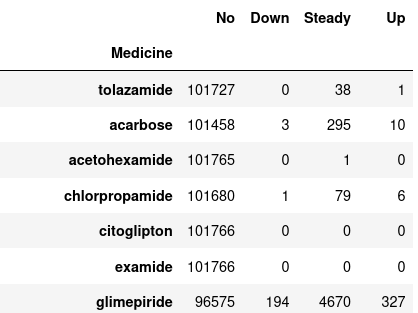

Funciona da seguinte maneira: o *data frame* possui dois índices. Os valores em negrito na parte de cima são as chaves do índice das colunas. Os valores em negrito nas linhas são as chaves do índice das linhas. A palavra "Medicine" no topo é o nome que vamos dar ao índice das linhas. Esse nome não é importante, mas deixa o nosso *data frame* mais elegante.

Vamos começa instanciando um *data frame* com os nomes das colunas e do índice.

In [748]:
medicine_counts = pd.DataFrame(columns=['No', 'Down', 'Steady', 'Up'])
medicine_counts.index.name = 'Medicine'
medicine_counts

,No,Down,Steady,Up
Medicine,,,,


Esse é o “esqueleto” do *data frame*. Agora precisamos preenchê-lo com valores. Para isso, vamos selecionar cada coluna que representa um medicamento e efetuar a contagem dos valores.

Primeiro, lembre-se (ou descubra) que, quando selecionamos uma coluna do *data frame*, o resultado é uma série do Pandas.

In [749]:
type(data['tolazamide'])

pandas.core.series.Series

Se usarmos o método `value_counts()` nessa série, o resultado também será uma série:

Veja:

In [750]:
data['tolazamide'].value_counts()

tolazamide
No        101727
Steady        38
Up             1
Name: count, dtype: int64

Note que o índice dessa série contém valores dos atributos. São os valores que o `value_counts()` encontrou na coluna `data['acarbose']`. O nome da série, por sua vez, é o nome da coluna.

Agora vem a mágica... &nbsp; &nbsp; :-)

Podemos criar uma nova linha no *data frame* `medicine_counts` fazendo uma atribuição em `.loc`. O nome da chave da nova linha será o nome do medicamento cuja contagem queremos adicionar (`tolazamide`).

Assim:

In [751]:
medicine_counts.loc['tolazamide'] = data['tolazamide'].value_counts()

In [752]:
medicine_counts

,No,Down,Steady,Up
Medicine,,,,
tolazamide,101727.0,NaN,38.0,1.0


Uau.

O Pandas "casou" o índice da série com o índice das colunas do *data frame* e criou uma nova linha! Se fizermos isso para todos os atibutos dos remédios, então teremos nossa tabela.

#### Exercício 15

> Itere sobre os valores da lista `medicine_features` e acrescente a contagem de cada remédio no *data frame*. (não se preocupe se aparecerem valores `NaN`)

In [753]:
for feature in medicine_features:
    medicine_counts.loc[feature] = data[feature].value_counts()

O resultado deve ser um *data frame* com 23 linhas e 4 colunas. Deve haver 2.220.564 ocorrências do valor `No`, 14.387 do valor `Down`, 90.802 do valor `Steady` e 14.865 do valor `Up`.

In [754]:
medicine_counts.shape

(23, 4)

In [755]:
medicine_counts.sum()

No        2220564.0
Down        14387.0
Steady      90802.0
Up          14865.0
dtype: float64

Só tem um porém... se você observou atentamente a primeira atribuição que fizemos, há um valor `NaN` ali.  Isso porque o atributo `data['tolazamide']` não possui nenhuma ocorrência do valor `Down`. Então quando essa e outras linhas foram adicionadas ao *data frame*, ganhamos valores ausentes.

Mas tudo bem. Se esses valores ausentes advém do fato que não há ocorrências de `No`, `Down`, `Steady` ou `Up`, então basta substituí-los por zero!

In [756]:
medicine_counts = medicine_counts.fillna(0).astype('int')
medicine_counts

,No,Down,Steady,Up
Medicine,,,,
tolazamide,101727,0,38,1
acarbose,101458,3,295,10
acetohexamide,101765,0,1,0
chlorpropamide,101680,1,79,6
citoglipton,101766,0,0,0
examide,101766,0,0,0
glimepiride,96575,194,4670,327
glimepiride-pioglitazone,101765,0,1,0
glipizide,89080,560,11356,770


Aí, sim.

Então agora podemos fazer algumas observações. A primeira delas é que existem duas medicações que não são utilizadas por nenhum paciente.

In [757]:
medicine_counts[medicine_counts['No'] == len(data)]

,No,Down,Steady,Up
Medicine,,,,
citoglipton,101766,0,0,0
examide,101766,0,0,0


Isso não é bom. Como nós veremos ao longo do curso, o indutor generaliza os exemplos fazendo observações sobre como os valores dos atributos mudam para as diferentes classes. Se um atributo só tem uma categoria ou um valor, então ele não deveiria estar na base!

In [758]:
data_backup = data.copy(deep=True)

#### Exercício 16

> Remova os atributos `['citoglipton', 'examide']` do *data frame* `data`. Use `drop()`. Não se esqueça de especificar o eixo das colunas (`axis=1` ou `axis='columns'`).

In [759]:
data.drop(['citoglipton', 'examide'], axis=1, inplace=True)

Confirme que apenas as colunas  desejadas foram removidas:

In [760]:
for f in ['citoglipton', 'examide']:
    print(f"Atributi {f} removido: {f not in data}")
print("Os 44 atributos restantes ainda estão no data frame:", data.shape[1] == 44)

Atributi citoglipton removido: True
Atributi examide removido: True
Os 44 atributos restantes ainda estão no data frame: True


Vamos atualizar a contagem de medicamentos também:

In [761]:
medicine_counts.drop(['citoglipton', 'examide'], axis=0, inplace=True)

Ok, mais dois atributos corretamente manipulados.

Agora tem a questão dos medicamentos que são usados por alguns pacientes, mas poucos deles. A decisão de como proceder nesse tipo de caso é delicada. Normalmente requer a opinião de um especialista. Mas como não temos nenhum especialista disponível (e o artigo não aborda isso com detalhes), então podemos empregar uma heurística simples. Vamos remover também os medicamentos que foram receitados em menos de 1% das consultas.

Precisamos descobrir que medicamentos são esses. Em outras palavras, queremos saber quais são as linhas de `medicine_counts` nas quais a coluna `No` tem um  valor acima de 99% do tamanho do *data frame* original.

In [762]:
medicine_counts[medicine_counts['No'] >= 0.99 * len(data)]

,No,Down,Steady,Up
Medicine,,,,
tolazamide,101727,0,38,1
acarbose,101458,3,295,10
acetohexamide,101765,0,1,0
chlorpropamide,101680,1,79,6
glimepiride-pioglitazone,101765,0,1,0
glipizide-metformin,101753,0,13,0
glyburide-metformin,101060,6,692,8
metformin-pioglitazone,101765,0,1,0
metformin-rosiglitazone,101764,0,2,0


Vamos coletar os nomes desses medicamentos em uma lista:

In [763]:
medicine_few = list((medicine_counts[medicine_counts['No'] >= 0.99 * len(data)]).index)

In [764]:
medicine_few

['tolazamide',
 'acarbose',
 'acetohexamide',
 'chlorpropamide',
 'glimepiride-pioglitazone',
 'glipizide-metformin',
 'glyburide-metformin',
 'metformin-pioglitazone',
 'metformin-rosiglitazone',
 'miglitol',
 'nateglinide',
 'tolbutamide',
 'troglitazone']

E agora vamos remover todas essas colunas. Mas, primeiro, outro backup.

In [765]:
data_backup = data.copy(deep=True)

#### Exercício 17


> Remova do *data frame* original todos os atributos listados em `medicine_few`.

In [766]:
data.drop(medicine_few, axis=1, inplace=True)

A célula a seguir irá verificar se alguma coluna está faltando ou sobrando.

In [767]:
expected_columns = set(['race', 'gender', 'age', 'admission_type_id', 'discharge_disposition_id', 'admission_source_id', 'time_in_hospital', 'medical_specialty', 'num_lab_procedures', 'num_procedures', 'num_medications', 'number_outpatient', 'number_emergency', 'number_inpatient', 'diag_1', 'diag_2', 'diag_3', 'number_diagnoses', 'max_glu_serum', 'A1Cresult', 'metformin', 'repaglinide', 'glimepiride', 'glipizide', 'glyburide', 'pioglitazone', 'rosiglitazone', 'insulin', 'change', 'diabetesMed', 'readmitted'])
found_columns = set(data.columns)

missing = expected_columns.difference(found_columns)
extra = found_columns.difference(expected_columns)

print(f"Colunas a mais: {'nenhuma' if len(extra) == 0 else extra}")
print(f"Coluna faltando: {'nenhuma' if len(missing) == 0 else missing}")

Colunas a mais: nenhuma
Coluna faltando: nenhuma


Quais são os atributos que sobraram?

In [768]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 31 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   race                      101766 non-null  object
 1   gender                    101766 non-null  object
 2   age                       101766 non-null  object
 3   admission_type_id         101766 non-null  int64 
 4   discharge_disposition_id  101766 non-null  int64 
 5   admission_source_id       101766 non-null  int64 
 6   time_in_hospital          101766 non-null  int64 
 7   medical_specialty         101766 non-null  object
 8   num_lab_procedures        101766 non-null  int64 
 9   num_procedures            101766 non-null  int64 
 10  num_medications           101766 non-null  int64 
 11  number_outpatient         101766 non-null  int64 
 12  number_emergency          101766 non-null  int64 
 13  number_inpatient          101766 non-null  int64 
 14  diag

### Últimos passos: atributos numéricos

Ainda não terminamos!

Todo o processo que fizemos até agora foi pensando na usabilidade dos dados. Nós lidamos com colunas que são identificadores, colunas que possuem informações que não podemos usar, valores ausentes e colunas com pouca informação.

Agora chegou a hora de nos preocuparmos com as necessidades do modelo.

O classificador que vamos utilizar aqui é o Naive Bayes categórico.

O que é o Naive Bayes categórico? É um modelo de classificação baseado em probabilidades. O primeiro passo para usar o Naive Bayes categórico é aprender as probabilidades dos atributos. Por exemplo, temos o atributo `insulin`, que indica que o paciente fez uso de insulina. Qual a probabilidade de um paciente com classe `NO` ter aumentado o uso de insulina?

In [769]:
pacientes_classe_NO = data[data['readmitted'] == 'NO']

In [770]:
# Quantidade de exemplos da classe NO
len(pacientes_classe_NO)

54864

In [771]:
pacientes_insulina_e_NO = pacientes_classe_NO[pacientes_classe_NO['insulin'] == 'Up']

In [772]:
# Quantidade de pacientes da classe NO que teve aumento no uso de insulina
len(pacientes_insulina_e_NO)

5484

Com essas duas informações, podemos calcular:

$$p(\text{insulina}=Up|\text{classe}=No) = \displaystyle\frac{\left|\text{classe}=No~\bigcap~\text{insulina}=Up\right|}{|\text{classe}=No|}$$

In [773]:
len(pacientes_insulina_e_NO) / len(pacientes_classe_NO)

0.0999562554680665

Essa probabilidade chama-se *verossimilhança* e é uma informação importante para o Naive Bayes. O modelo precisa calcular esse tipo de probabilidade para todas as combinações de valores dos atributos e de classes.

Note que o cálculo é feito por contagem de valores ($|\text{classe}=No|$ significa “o tamanho do conjunto de todos os exemplos que contem o valor `NO` para a classe). Portanto o Naive Bayes categórico não pode ter atributos numéricos.

Então precisamos identificar os tipos numéricos. Como? Bem, através do método `info`, você pode verificar que algumas colunas do *data frame* possuem tipos inteiros. *Porém*, isso não quer dizer que eles sejam realmente numéricos. Alguns, como `admission_type_id`, são valores categóricos que estão sendo representados como valores numéricos. Para saber quais atributos são realmente numéricos, você deve entender o que eles significam. Felizmente, isso já foi feito para você. Os atributos numéricos desse conjunto são os seguintes:

In [774]:
numeric_features = ['time_in_hospital', 'num_lab_procedures', 'num_procedures', 'num_medications', 'number_outpatient', 'number_emergency', 'number_inpatient', 'number_diagnoses']

Podemos explorar esses atributos usando histogramas:

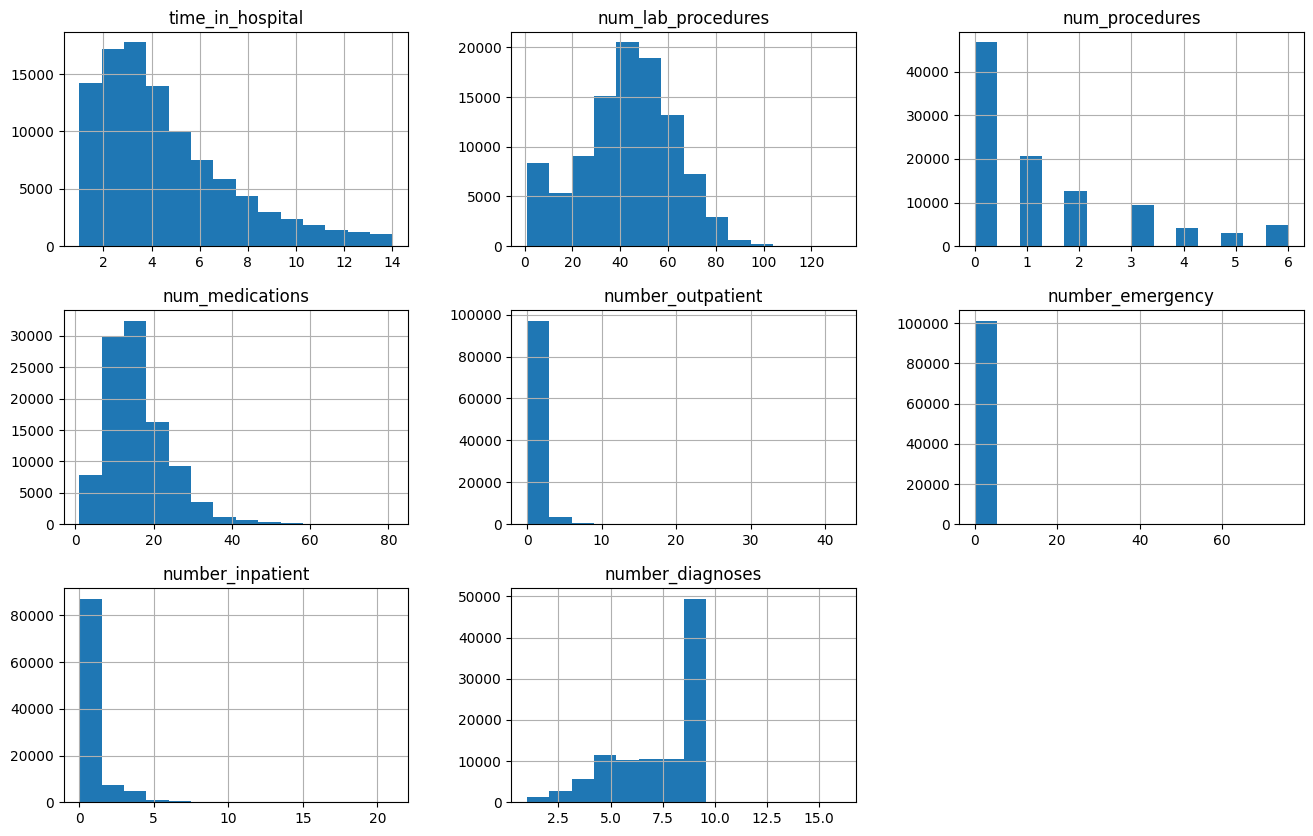

In [775]:
data[numeric_features].hist(figsize=(16, 10), bins=14);

Temos três opções:

1. Fingir que esses valores são categóricos. Isso é ruim porque muitos atributos acabariam com uma quantidade muito grande de categorias;
1. Remover os atributos. Isso pode ser necessário, mas em geral é algo que queremos evitar, pois cada atributo removido é informação perdida. Vamos tentar fazer uso desses atributos;
1. Quantizar os atributos. Essa será nossa saída.

Quantizar um atributo significa mapear os valores originais para um conjunto de intervalos de valores inteiros. O próprio *data frame* original já possui alguns valores quantizados. Um exemplo é o atributo `'age'`. Se você verificar os valores presentes nesse atributo, poderá confirmar que eles foram transformados em intervalos de dez em dez anos.

#### Exercício 18

> Verifique quais são os valores presentes no atributo `age` (usando `value_counts` ou outro método).

In [776]:
age_counts = data['age'].value_counts()
age_counts

age
[70-80)     26068
[60-70)     22483
[50-60)     17256
[80-90)     17197
[40-50)      9685
[30-40)      3775
[90-100)     2793
[20-30)      1657
[10-20)       691
[0-10)        161
Name: count, dtype: int64

Você poderá notar que os pacientes estão em faixas como `[0-10)`, que inclui pessoas de 0 a 9 anos e `[40-50)`, que inclui pessoas de 40 a 49 anos.

Por que essas faixas foram escolhidas? Essa pergunta deveria ser feita aos autores da base!

De maneira geral, é importante considerar o significado dos atributos antes de fazer a quantização. Mas, como não dispomos de muita informação do domínio médico, vamos adotar algumas práticas genéricas com base no que observamos no histograma.

Primeiro, quantize os atributos `'num_lab_procedures'` e `'num_medications'` em intervalos de 10 em 10. Não é necessário formatá-los como feito com `'age'`. Apenas troque os valores exatos por valores de dez em dez.

In [777]:
f = ['num_lab_procedures', 'num_medications']
data[f] = 10 * np.ceil(data[f] / 10)

Observe que todos os valores no intervalo $[0, 10]$ foram representados como `10.0`, valores no intervalo $[11, 20]$ foram representados como `20.0` e assim por diante:

In [778]:
data[['num_lab_procedures', 'num_medications']]

,num_lab_procedures,num_medications
0,50.0,10.0
1,60.0,20.0
2,20.0,20.0
3,50.0,20.0
4,60.0,10.0
...,...,...
101761,60.0,20.0
101762,40.0,20.0
101763,60.0,10.0
101764,50.0,30.0


In [779]:
data['num_lab_procedures'].value_counts()

num_lab_procedures
50.0     22249
40.0     18084
60.0     17817
70.0     12259
30.0      9665
10.0      8383
20.0      6153
80.0      5216
90.0      1513
100.0      363
110.0       50
120.0       10
130.0        3
140.0        1
Name: count, dtype: int64

In [780]:
data['num_medications'].value_counts()

num_medications
20.0    52025
10.0    25861
30.0    18643
40.0     3876
50.0      931
60.0      333
70.0       89
80.0        7
90.0        1
Name: count, dtype: int64

Os atributos `['number_outpatient', 'number_emergency', 'number_inpatient', 'number_diagnoses']` merecem atenção especial. Vamos olhar seus histogramas novamente.

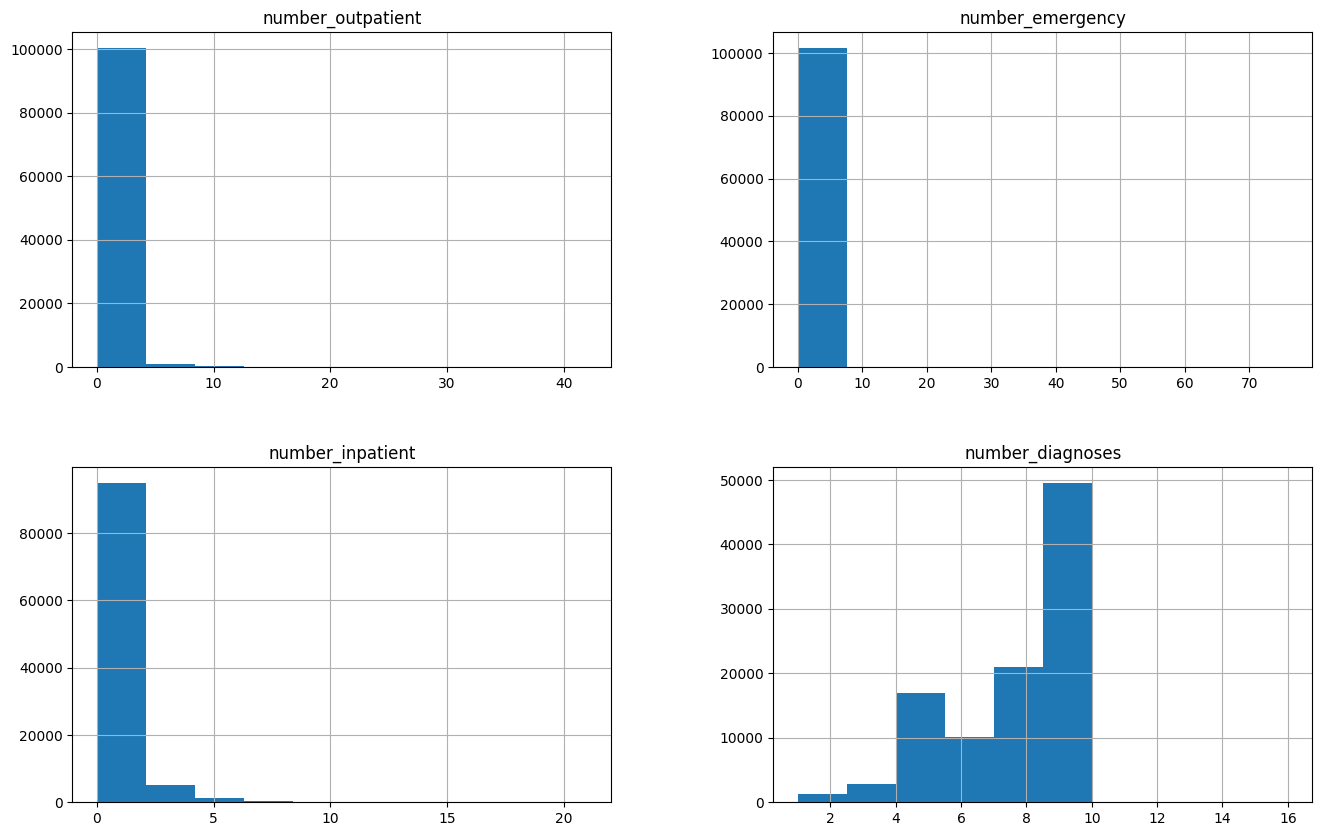

In [781]:
special_features = ['number_outpatient', 'number_emergency', 'number_inpatient', 'number_diagnoses']
data[special_features].hist(figsize=(16, 10));

A distribuição é muito desigual. Assim fica difícil enxergar os histogramas.

Podemos visualizar melhor os dados se plotarmos o histograma em escala logarítmica. Para isso, precisamos manipular um pouquinho as figuras produzidas pelo PyPlot. O código está abaixo com comentários. Você pode estudar o código e quebrá-lo em partes para explorar o que ele faz e o que é retornado em cada comando.

In [782]:
# Importa o PyPlot
import matplotlib.pyplot as plt

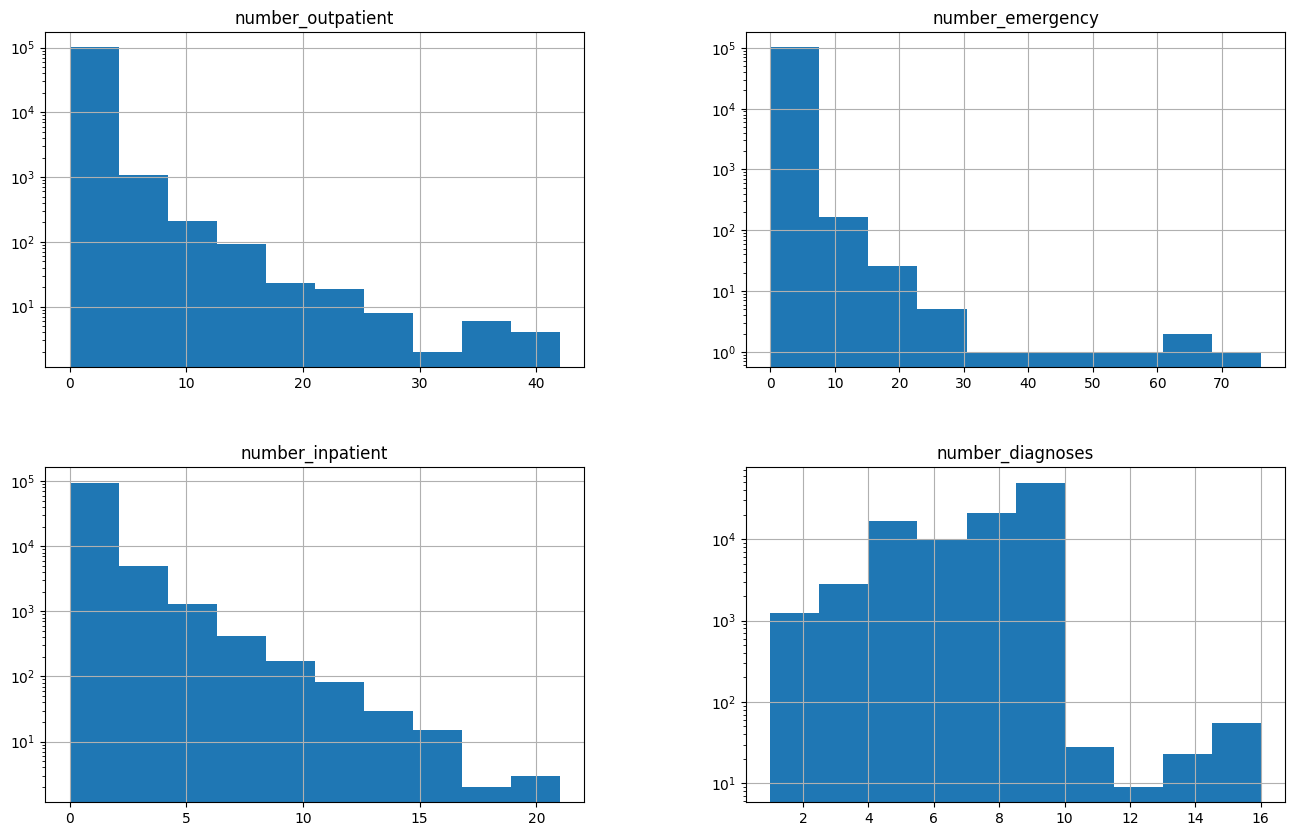

In [784]:
# Cria um "subplot" com duas linhas e duas colunas. No exemplo anterior
# o Pandas fez isso automaticamente, mas agora queremos ter acesso aos
# objetos que representam os gráficos para podermos alterar o eixo y.
#
# O plt.subplots() retorna dois valores. O primeiro representa a figura
# e o segundo representa os eixos que queremos manipular
_, ax = plt.subplots(2, 2, figsize=(16, 10));

# Usamos o método hist() do própio data frame, especificando onde
# estão os eixos nos quais ele deve desenhar os histogramas
data[special_features].hist(ax=ax, figsize=(16, 10));

# Agora vamos em cada eixo e definimos a escala y como logarítmica
for plot_row in range(2):
    for plot_col in range(2):
        ax[plot_row][plot_col].set_yscale('log');

Aqui a decisão será um pouco mais arbitrária. Vamos tentar fazer julgamento desses atributos:

- `number_outpatient`: quantas vezes o paciente foi ao hospital no ano anterior;
- `number_inpatient`: quantas internações (pelo menos um dia) o paciente teve no ano anterior;
- `number_emergency`: quantas vezes o paciente precisou de atendimento de urgência;
- `number_diagnosis`: quantos diagnósticos o paciente tem registrados no sistema.



Para os três primeiros, vamos converter na seguinte escala:

| Intervalo original ||  Valor transformado || Significado |
| - | - | :-: | - | :- |
| $[0]$ || `'0'` || Nenhuma ocorrência |
| $[1, 11]$ || `'<1'` || Menos de uma por mês |
| $[12, 23]$ || `'1-2'` || Ao menos uma por mês, menos que duas|
| $[24, \infty)$ || `'2+'` || Duas ou mais ocorrências or mês |

Isso pode ser feito com `pd.cut()`. Ela recebe como entrada uma série e uma lista de intervalos e retorna uma série com os valores convertidos para esses intervalos. É quase um "histograma inverso". Em vez de analisar os valores e contar quantos caem em cada *bin*, ele força os valores a serem colocados em cada *bin*.

---------
**Uma demonstração**

Para ilustrar, veja a seguinte série de exemplo, que possui alguns valores compatíveis com os intervalos dos atributos que estamos querendo quantizar.

In [786]:
serie = pd.Series(range(30))
serie

0      0
1      1
2      2
3      3
4      4
5      5
6      6
7      7
8      8
9      9
10    10
11    11
12    12
13    13
14    14
15    15
16    16
17    17
18    18
19    19
20    20
21    21
22    22
23    23
24    24
25    25
26    26
27    27
28    28
29    29
dtype: int64

Vamos empregar `pd.cut()` nessa série com os pontos de corte acima especificados.

In [787]:
pd.cut(serie, bins=[0, 1, 12, 24, serie.max()+1], right=False)

0       [0, 1)
1      [1, 12)
2      [1, 12)
3      [1, 12)
4      [1, 12)
5      [1, 12)
6      [1, 12)
7      [1, 12)
8      [1, 12)
9      [1, 12)
10     [1, 12)
11     [1, 12)
12    [12, 24)
13    [12, 24)
14    [12, 24)
15    [12, 24)
16    [12, 24)
17    [12, 24)
18    [12, 24)
19    [12, 24)
20    [12, 24)
21    [12, 24)
22    [12, 24)
23    [12, 24)
24    [24, 30)
25    [24, 30)
26    [24, 30)
27    [24, 30)
28    [24, 30)
29    [24, 30)
dtype: category
Categories (4, interval[int64, left]): [[0, 1) < [1, 12) < [12, 24) < [24, 30)]

O parâmetro `right=False` é usado para indicar que não queremos incluir o valor à direita, de modo que cada intervalo é fechado à esquerda e aberto à direita (o padrão é `right=True`).

Desse modo, o primeiro intrvalo definido pelo Pandas, `[0, 1)`, corresponde a “nenhuma ocorrência”. O segundo, `[1, 12)`, corresponde a “menos de uma ocorrência por mês” e assim por diante. O último intervalo precisa ser especificado com base no maior valor presente na série.

(*fim da demonstração*)

---------

Com esse método, podemos quantizar cada um dos atributos anteriormente mencionados. Porém, em vez de deixar o Pandas especificar rótulos com base nos intervalos,  vamos especificar os rótulos como na tabela acima.

In [789]:
quantize_features =  ['number_outpatient', 'number_emergency', 'number_inpatient']
for f in quantize_features:
    lim = max(data[f].max() +1, 25)
    data[f] = pd.cut(data[f], bins=[0, 1, 12, 24, lim], labels=['0', '<1', '1-2', '2+'], right=False)

Distribuição final dos valores:

In [790]:
for f in quantize_features:
    print(data[f].value_counts())
    print()

number_outpatient
0      85027
<1     16553
1-2      161
2+        25
Name: count, dtype: int64

number_emergency
0      90383
<1     11317
1-2       54
2+        12
Name: count, dtype: int64

number_inpatient
0      67630
<1     34052
1-2       84
2+         0
Name: count, dtype: int64



Existe uma última coisa que não fizemos neste *notebook*, que é filtrar instâncias com base em algum atributo. Às vezes é necessário descartar *outliers* ou outros valores fora do padrão.

Novamente, isso tipicamente exige conhecimento do domínio e uma análise estatística dos atributos. Como um exercício, vamos supor, com base no histograma, que todas as instâncias com valores acima de 10 no atributo `'number_diagnoses'` são *outliers*  e vamos descartá-las.

#### Exercício 19

> Remova do *data frame* todas as instâncias que possuem valor maior que 10 para o atributo `'number_diagnoses'`.
>
> *Dica*: você pode tentar *remover* os exemplos que possuem valor maior que 10 **ou** você pode gerar uma cópia contendo apenas os exemplos com valor menor-ou-igual a 10.

In [791]:
data = data[data['number_diagnoses'] <= 10]

Se você verificou antes de fazer a remoção, descobriu que existem apenas 98 instâncias com esses valores. O *data frame* resultante deve ter exatamente 101.668 instâncias.

In [792]:
if len(data) != 101668:
    print('Seu data frame não contém o número certo de exemplos.')
    print('Deveriam ser 101.668, mas são', len(data))
else:
    print('Seu data frame contém 101.668 exemplos, como esperado.')

Seu data frame contém 101.668 exemplos, como esperado.


## Separação e codificação dos dados

Finalmente, chegamos ao ponto de treinar e testar o modelo!!

Novamente, nesta atividade você deverá fazer o procedimento como uma “caixa preta“, sem procurar entender exatamente o que está acontecendo. Depois tudo ficará mais claro.

Os passo serão os seguintes.

1. Separar o *data frame* em uma matriz que contém os atributos de entrada e um vetor que contém o atributo de saída;
1. Utilizar `OrdinalEncoder` para codificar todos as strings  em inteiros;
1. Separar exemplos em um conjunto de treino e um conjunto de teste;
1. Treinar e testar o modelo;
1. Calcular a taxa de acerto.

Vamos começar separando os exemplos em uma matriz de características e um vetor de atributos.

#### Exercício 20

> Execute as células abaixo e separe os dados em matriz de características (`X`) e vetor de atributos (`y`).

In [793]:
# Seleciona todas as colunas, exceto a última
X = data.iloc[:, :-1]

A matriz `X` deve ter 101.668 linhas e 30 colunas.

In [794]:
X.shape

(101668, 30)

Seleciona a última coluna (classe)

In [795]:
y = data.iloc[:, -1]

O vetor `y` deve conter 101.668 elementos.

In [796]:
y.shape

(101668,)

Estamos quase lá.

Porém o Scikit-Learn possui uma peculiaridade. Mesmo métodos que trabalham com valores categóricos exigem valores numéricos para trabalhar. Quer dizer, o `sklearn` não admite strings, apenas `float`s e `int`s.

Se tivermos um atributo categórico representado com strings, ele precisa ser mapeado para valores inteiros. Por exemplo, tome a classe (`readmitted`). Um possível mapeamento para ela é o seguinte:

| **Valor original** | **Valor mapeado** |
| :- | :-|
| `'<30'` | `0` |
| `'>30'` | `1` |
| `'NO'` | `2` |

Isso pode ser feito com duas classes. Uma para matrizes, outra para vetores.

- `OrdinalEncoder`: codifica as strings da matriz para valores numéricos;
- `LabelEncoder`: codifica as strings do vetor para atributos numéricos.

A codificação é feita em dois passos:

1. O método `fit` é aplicado nos dados de treinamento para **aprender** a codificação
1. O método `transform` é aplicado em todos os dados para **aplicar** a codificação

#### Exercício 21

> Execute as células abaixo para usar `OrdinalEncoder` com a matriz `X` e codificar as características.

In [797]:
from sklearn.preprocessing import OrdinalEncoder

In [798]:
oe = OrdinalEncoder()

In [799]:
oe.fit(X);

In [800]:
X = oe.transform(X)

Observe que agora a matriz `X` contém apenas valores numéricos:

In [802]:
X


array([[2., 0., 0., ..., 1., 1., 0.],
       [2., 0., 1., ..., 3., 0., 1.],
       [0., 0., 2., ..., 1., 1., 1.],
       ...,
       [0., 0., 8., ..., 2., 1., 1.],
       [2., 0., 8., ..., 3., 0., 1.],
       [2., 1., 7., ..., 1., 1., 0.]])

Se quisermos, podemos usar o método `inverse_transform` para recuperar as strings. A célula abaixo mostra os dados da primeira linha:

In [803]:
oe.inverse_transform([X[0]])

array([['Caucasian', 'Female', '[0-10)', 6, 25, 1, 1,
        'Pediatrics-Endocrinology', 50.0, 0, 10.0, '0', '0', '0',
        '250.83', '276', '250', 1, 'None', 'None', 'No', 'No', 'No',
        'No', 'No', 'No', 'No', 'No', 'No', 'No']], dtype=object)

Compare com a primeira linha do *data frame*:

In [804]:
data.iloc[0]

race                                       Caucasian
gender                                        Female
age                                           [0-10)
admission_type_id                                  6
discharge_disposition_id                          25
admission_source_id                                1
time_in_hospital                                   1
medical_specialty           Pediatrics-Endocrinology
num_lab_procedures                              50.0
num_procedures                                     0
num_medications                                 10.0
number_outpatient                                  0
number_emergency                                   0
number_inpatient                                   0
diag_1                                        250.83
diag_2                                           276
diag_3                                           250
number_diagnoses                                   1
max_glu_serum                                 

#### Exercício 22

> Execute as células abaixo para usar `LabelEncoder` com o vetor `y` e codificar as strings da classe.

In [805]:
from sklearn.preprocessing import LabelEncoder

In [806]:
le = LabelEncoder()

In [807]:
le.fit(y);

In [808]:
y = le.transform(y)

A exemplo do caso anterior, repare que o vetor `y` contém apenas valores numéricos

In [809]:
y

array([2, 1, 2, ..., 2, 2, 2])

Podemos usar `inverse_transform` para explorar o mapeamento:

In [810]:
le.inverse_transform([0, 1, 2])

array(['<30', '>30', 'NO'], dtype=object)

Agora vamos gerar os conjuntos de treinamento e de teste. Normalmente nós faríamos isso com uma técnica de reamostragem. Mas como ainda não estudamos esse conceito, vamos fazer o seguinte:

1. Os primeiros 30 mil exemplos serão usados para teste
1. O restante será usado para treinamento

Primeiro, vamos selecionar 30 mil linhas da matriz `X` em uma matriz de teste:

In [811]:
Xteste = X[:30000]

E 30 mil valores do vetor `y` em um vetor de teste:

In [812]:
yteste = y[:30000]

#### Exercício 23

> Selecione todas as linhas restantes da matriz `X` e do vetor `y` para treinamento.

In [813]:
Xtreino = X[30000:]

In [814]:
ytreino = y[30000:]

Agora vamos treinar o modelo.

O Naive Bayes categórico está implementado no `sklearn` pela classe `sklearn.naive_bayes.CategoricalNB`.

O procedimento é parecido com o que fizemos para os codificadores (`OrdinalEncoder` e `LabelEncoder`):

1. Tomando cuidado de não misturar dados de treino e de teste, usaremos o método `fit` **no treino** para treinar o modelo
1. Tomando cuidado de não misturar dados de treino e de teste, usaremos o método `predict` para testar o modelo

#### Exercício 24

> Estude e execute as células abaixo para treinar e testar o modelo.

1. Instanciaremos um objeto da classe `CategoricalNB`. Aqui seria o momento de definir os hiperparâmetros do modelo, mas vamos deixar os valores padrões do `sklearn` por enquanto.

In [815]:
from sklearn.naive_bayes import CategoricalNB

In [816]:
clf = CategoricalNB()

2. Vamos usar o método `fit` nos dados **de treino**. A palavra *fit* significa "ajuste". Ele *ajusta* o modelo aos dados, encontrando os parâmetros ideais para a nossa amostra. Isso é o **treinamento** do modelo.

In [817]:
clf.fit(Xtreino, ytreino);

Observe que o método `fit` recebe dois argumentos: a matriz de entrada e o vetor de saída. Será sempre assim para classificadores, pois estamos trabalhando com aprendizado supervisionado. O algoritmo precisa saber qual é a classe correta para cada exemplo.

3. Vamos usar o método `predict` nos dados de teste. A palavra *predict*  significa "prever". Um modelo faz previsões. E o objetivo de modelos de classificação é justamente prever a classe correta para exemplos (idealmente) novos.

In [818]:
ypred = clf.predict(Xteste)

Observe que o método `predict` só recebe um argumento, que é uma matriz de dados de entrada. O retorno desse método é a previsão.

A matriz de entrada (conjunto de teste) possui 30 mil linhas:

In [819]:
len(Xteste)

30000

A saída do método `predict` também possui 30 mil linhas:

In [820]:
len(ypred)

30000

Cada valor do vetor `ypred` é uma previsão para a linha respectiva da matriz `Xteste`. Vejamos... o primeiro exemplo do conjunto de treinamento, como vimos anteriormente, é uma menina caucasiana com menos de 10 anos:

In [821]:
oe.inverse_transform([Xteste[0]])

array([['Caucasian', 'Female', '[0-10)', 6, 25, 1, 1,
        'Pediatrics-Endocrinology', 50.0, 0, 10.0, '0', '0', '0',
        '250.83', '276', '250', 1, 'None', 'None', 'No', 'No', 'No',
        'No', 'No', 'No', 'No', 'No', 'No', 'No']], dtype=object)

A classe correta desse paciente (de acordo com a nossa base) é `NO`:

In [822]:
le.inverse_transform([yteste[0]])

array(['NO'], dtype=object)

A saída obtida pelo modelo está na primeira posição do vetor `ypred`:

In [823]:
le.inverse_transform([ypred[0]])

array(['NO'], dtype=object)

Vejam só... o modelo acertou!

Será que isso se repete para todos os exemplos? Vamos calcular a porcentagem de acertos do modelo. Essa é uma métrica chamada **acurácia** e o `sklearn` possui uma função que faz esse cálculo:

#### Exercício 25

> Exeute a célula abaixo para calcular a acurácia do modelo no conjunto de teste.

In [824]:
from sklearn.metrics import accuracy_score

In [825]:
accuracy_score(yteste, ypred)

0.5655666666666667

A função `accuracy_score` recebe sempre dois argumentos: um vetor de rótulos verdadeiros (da base) e um vetor de rótulos preditos (do classificador), nessa ordem. O resultado é a porcentagem de valores que coincidem nos dois vetores; isto é, a taxa de acerto do classificador.

A acurácia encontrada será próxima de 56,56%.

É um valor de acurácia bem baixo. Como comentamos, o conjunto ainda está longe de ser ideal. Por exemplo, tem muita informação dos mesmos pacientes ocorrendo diversas vezes ao longo das instâncias. Isso introduz um certo viés ao modelo. Além disso, existem atributos que seriam melhor representados como valores inteiros do que categóricos e atributos que deveriam ser mesclados. Nós também não testamos diferentes formas de quantizar os atributos numéricos.

Para sabermos se isso é um caso de *underfitting* ou *overfitting*, precisamos verificar a acurácia no conjunto de treinamento. Os passos são os mesmos:

1. Testamos o modelo no conjunto de treino (com `predict`)
1. Comparamos a saída do modelo com as classes corretas (em `ytreino`)

A célula abaixo faz tudo de uma vez:

In [826]:
accuracy_score(clf.predict(Xtreino), ytreino)

0.5860774683261707

O resultado deve ter sido aproximadamente 58,61%. Será que isso é baixo? Ora, se você se recordar de várias células atrás, a classe majoritária do conjunto de dados era `NO`, com aproximadamente 53% dos exemplos pertencentes a ela. Isso significa que um classificador "burro" que simplesmente "chuta" todos os exemplos como `NO` teria uma acurácia de aproximadamente 53%.

O nosso classificador, conseguido com relativo esforço, teve um desempenho não muito superior a isso. É uma baixa acurácia, tanto no treino, quanto no teste, portanto estamos muito provavelmente diante de um caso de *underfitting*.

Mas o foco desta aula não era o modelo.

Aqui você aprendeu diversas técnicas para pré-processar um conjunto de dados. Vamos focar, no restante do curso, em como usar essas técnicas de maneira apropriada, em conjunto com todas as outras técncias que vamos estudar, para obter modelos precisos!

Não se esqueça das lições obtidas aqui. O pré-processamento é uma das etapas mais importantes do processo de aprendizado de máquina.

Para finalizar, envie o seu *notebook* completo pelo ColabWeb. Não se esqueça de baixar do Google Drive caso tenha completado a atividade no Colaboratory.